# ipywidgets learning

Goal:  build an interface for programming Evernote using IPython widgets.

Let me list the relevant tutorial materials:

* [ipywidgets/Index.ipynb at master · ipython/ipywidgets](https://github.com/ipython/ipywidgets/blob/master/examples/notebooks/Index.ipynb)

In [1]:
from __future__ import print_function

from ipywidgets import (interact, interactive, fixed)
import ipywidgets as widgets

from IPython.display import (HTML, display, Javascript)

# for function annotation in Python 3
from IPython.utils.py3compat import annotate

What is the best way to get a list of widgets?  According to [ipywidgets/Widget List.ipynb at master · ipython/ipywidgets](https://github.com/ipython/ipywidgets/blob/master/examples/notebooks/Widget%20List.ipynb):

```Python
import ipywidgets as widgets
widgets.Widget.widget_types.values()
```



In [2]:
widgets.Widget.widget_types.values()

[ipywidgets.widgets.widget_int.IntRangeSlider,
 ipywidgets.widgets.widget_selection.RadioButtons,
 ipywidgets.widgets.widget_controller.Axis,
 ipywidgets.widgets.widget_float.FloatSlider,
 ipywidgets.widgets.widget_int.IntSlider,
 ipywidgets.widgets.widget_image.Image,
 ipywidgets.widgets.widget_selection.SelectMultiple,
 ipywidgets.widgets.widget_string.HTML,
 ipywidgets.widgets.widget_box.Box,
 ipywidgets.widgets.widget_float.BoundedFloatText,
 ipywidgets.widgets.widget_selectioncontainer.Accordion,
 ipywidgets.widgets.widget_button.Button,
 ipywidgets.widgets.widget_bool.Valid,
 ipywidgets.widgets.widget_selection.Dropdown,
 ipywidgets.widgets.widget_selection.SelectionSlider,
 ipywidgets.widgets.widget_box.Proxy,
 ipywidgets.widgets.widget_string.Text,
 ipywidgets.widgets.widget_selection.ToggleButtons,
 ipywidgets.widgets.widget_color.ColorPicker,
 ipywidgets.widgets.widget_float.FloatRangeSlider,
 ipywidgets.widgets.widget_bool.Checkbox,
 ipywidgets.widgets.widget_controller.Cont

In [3]:
widgets.Widget.widget_types.values()[0].__name__

'IntRangeSlider'

In [4]:
import ipywidgets as widgets
[w.__name__ for w in widgets.Widget.widget_types.values()]

['IntRangeSlider',
 'RadioButtons',
 'Axis',
 'FloatSlider',
 'IntSlider',
 'Image',
 'SelectMultiple',
 'HTML',
 'Box',
 'BoundedFloatText',
 'Accordion',
 'Button',
 'Valid',
 'Dropdown',
 'SelectionSlider',
 'Proxy',
 'Text',
 'ToggleButtons',
 'ColorPicker',
 'FloatRangeSlider',
 'Checkbox',
 'Controller',
 'PlaceProxy',
 'FloatText',
 'FlexBox',
 'ToggleButton',
 'Latex',
 'Select',
 'IntProgress',
 'Textarea',
 'Tab',
 'IntText',
 'FloatProgress',
 'BoundedIntText',
 'Button']

In [5]:
standard_handlers = set(['on_displayed', 'on_msg', 'on_trait_change', 'on_widget_constructed'])

# It seems one will use on_trait_change a lot. I'll need to learn more the other three standard ones
# extra handlers: on_msg, on_displayed, on_widget_constructed


# Text -> on_submit
# Button -> on_click

for w in widgets.Widget.widget_types.values():
    print ((w,set([m for m in dir(w) if m.startswith("on_")]) - standard_handlers))

(<class 'ipywidgets.widgets.widget_int.IntRangeSlider'>, set([]))
(<class 'ipywidgets.widgets.widget_selection.RadioButtons'>, set([]))
(<class 'ipywidgets.widgets.widget_controller.Axis'>, set([]))
(<class 'ipywidgets.widgets.widget_float.FloatSlider'>, set([]))
(<class 'ipywidgets.widgets.widget_int.IntSlider'>, set([]))
(<class 'ipywidgets.widgets.widget_image.Image'>, set([]))
(<class 'ipywidgets.widgets.widget_selection.SelectMultiple'>, set([]))
(<class 'ipywidgets.widgets.widget_string.HTML'>, set([]))
(<class 'ipywidgets.widgets.widget_box.Box'>, set([]))
(<class 'ipywidgets.widgets.widget_float.BoundedFloatText'>, set([]))
(<class 'ipywidgets.widgets.widget_selectioncontainer.Accordion'>, set([]))
(<class 'ipywidgets.widgets.widget_button.Button'>, set(['on_click']))
(<class 'ipywidgets.widgets.widget_bool.Valid'>, set([]))
(<class 'ipywidgets.widgets.widget_selection.Dropdown'>, set([]))
(<class 'ipywidgets.widgets.widget_selection.SelectionSlider'>, set([]))
(<class 'ipywidg

In [6]:
dir(widgets)

['Accordion',
 'BoundedFloatText',
 'BoundedIntText',
 'Box',
 'Button',
 'CallbackDispatcher',
 'Checkbox',
 'Color',
 'ColorPicker',
 'Controller',
 'DOMWidget',
 'Dropdown',
 'EventfulDict',
 'EventfulList',
 'FlexBox',
 'FloatProgress',
 'FloatRangeSlider',
 'FloatSlider',
 'FloatText',
 'HBox',
 'HTML',
 'Image',
 'IntProgress',
 'IntRangeSlider',
 'IntSlider',
 'IntText',
 'Latex',
 'Layout',
 'Output',
 'PlaceProxy',
 'Proxy',
 'RadioButtons',
 'Select',
 'SelectMultiple',
 'SelectionSlider',
 'Tab',
 'Text',
 'Textarea',
 'ToggleButton',
 'ToggleButtons',
 'VBox',
 'Valid',
 'Widget',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 '__version__',
 '_handle_ipython',
 '_version',
 'domwidget',
 'eventful',
 'find_static_assets',
 'fixed',
 'get_ipython',
 'handle_kernel',
 'handle_version_comm_opened',
 'interact',
 'interact_manual',
 'interaction',
 'interactive',
 'jsdlink',
 'jslink',
 'load_ipython_extension',
 'os',
 'register',
 'regis

## interact

In [7]:
import math
i = interact(lambda x: math.factorial(x),
         x=widgets.IntSlider(min=0,max=2000,step=1,value=10));


3628800

In [8]:
type(i.widget)

ipywidgets.widgets.widget_box.Box

In [9]:
# I can mess with the value of the input -- and the IntSlider moves, the output doesn't change above
i.widget.children[0].value =2

2

I thought with `interact`, I could change `x` and the widget would change....nope.

## interactive

In [10]:
def f(a,b):
    return a+b

In [11]:
w = interactive(f, a=10, b=20)

In [12]:
display(w)

30

In [13]:
# how can I control the parameters in Python?

In [14]:
c0 = w.children[0]
(c0.description, c0.value)

(u'a', 10)

In [15]:
c0.value = 23

43

In [16]:
w.kwargs

{'a': 23, 'b': 20}

In [17]:
w.result

43

# using widgets without JS

[Question about how to use existing widgets without necessarily creating custom widgets · Issue #263 · ipython/ipywidgets](https://github.com/ipython/ipywidgets/issues/263)

/Users/raymondyee/anaconda/envs/myenv/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


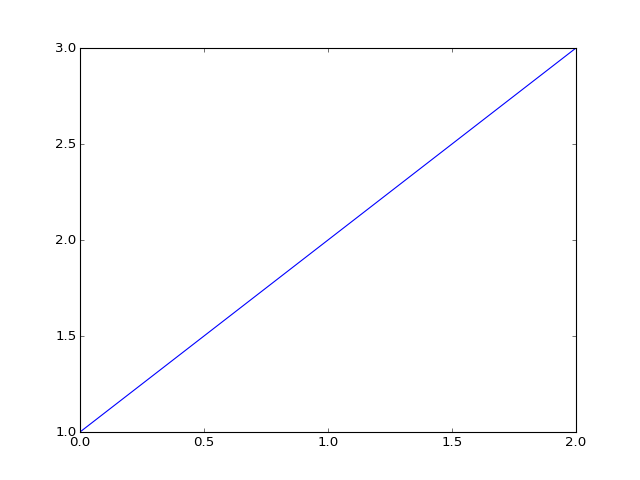

In [18]:
%matplotlib notebook
from ipywidgets import HBox, VBox, Button
from IPython.display import display
from matplotlib import pyplot as plt

red = Button(description='Make Red')
green = Button(description='Make Green')

fig, ax = plt.subplots()
ax.plot([1,2,3])

def make_red(button):
    ax.lines[0].set_color('red')
    ax.figure.canvas.draw()

def make_green(button):
    ax.lines[0].set_color('green')
    ax.figure.canvas.draw()

red.on_click(make_red)
green.on_click(make_green)
display(HBox([red, green]))

In [19]:
int_range = widgets.IntSlider()
display(int_range)

def on_value_change(name, value):
    print(value)

int_range.on_trait_change(on_value_change, 'value')

/Users/raymondyee/anaconda/envs/myenv/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: on_trait_change is deprecated: use observe instead


In [20]:
from __future__ import print_function

t_widget = widgets.Text()
display(t_widget)

num_events = 0

def on_text_change(name, value):
    
    global num_events 
    print ('\r{}: {}'.format(num_events, value), end="")
    num_events +=1
    
t_widget.on_trait_change(on_text_change, 'value')

/Users/raymondyee/anaconda/envs/myenv/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: on_trait_change is deprecated: use observe instead


In [21]:
# list of traits -- lot more traits than I expected.
t_widget.trait_names()

['_view_name',
 '_msg_callbacks',
 '_states_to_send',
 'color',
 '_view_module',
 'height',
 '_property_lock',
 'visible',
 'border_radius',
 'border_width',
 'background_color',
 'font_style',
 'layout',
 'log',
 '_display_callbacks',
 '_model_module',
 'width',
 'config',
 'font_family',
 '_dom_classes',
 'description',
 'parent',
 '_model_name',
 'keys',
 'border_color',
 'padding',
 'font_weight',
 'comm',
 'placeholder',
 'border_style',
 'disabled',
 'font_size',
 'msg_throttle',
 'value',
 'margin']

In [ ]:
t_widget.background_color = '#FFFF00'
t_widget.border_color = 'blue'

In [ ]:
t_widget.value = "dddd"

In [ ]:
from collections import OrderedDict
import datetime

def inv_dict(d):
    return dict([(v,k) for (k,v) in d.items()])

w = widgets.Dropdown(
    options=OrderedDict([('Apple', 1), ('Orange', 2), ('Plum', 3), ('Watermelon',4)]),
    value=2,
    description='Number:',
)

def w_changed(name, value):
    d = inv_dict(w.options)
    
    t_widget.value = unicode(unicode(value) + ":" + d.get(value,''))

w.on_trait_change(w_changed, 'value')

t_widget = widgets.Text()

display(w, t_widget)



In [ ]:
OrderedDict([(v,k) for (k,v) in w.options.items()])

In [ ]:
w.value = 4

In [ ]:
w.options = OrderedDict(w.options.items() + [('Peaches', 5)])

In [ ]:
from IPython.display import HTML
HTML("<div>hello</div>")

In [ ]:
qgrid.show_grid(spy)

# how to use/extend qqgrid widget?

How to use `QGridWidget`, identified in [Add an IPython widget by blink1073 · Pull Request #27 · quantopian/qgrid](https://github.com/quantopian/qgrid/pull/27/files#diff-2559840b81815e696a22fbaee6294b66R172)?

My impression is that we still use the main `qgrid.show_grid` but that we can make use of events in the underlying `QGridWidget`.  Let's see. 

# little detour into learning about making custom widgets

In [ ]:
from ipywidgets import widgets
import traitlets

In [ ]:
class HelloView(widgets.DOMWidget):
    _view_name = traitlets.Unicode("HelloView", sync=True)
    value = traitlets.Unicode("Hello World", sync=True)


In [ ]:
%%javascript
requirejs(['nbextensions/widgets/widgets/js/widget',
         'nbextensions/widgets/widgets/js/manager',], function(widget, manager){
    
    var HelloView = widget.DOMWidgetView.extend({
        
        render: function(){
            this.value_changed();
            this.model.on('change:value', this.value_changed, this);
        },
        
        value_changed: function () {
            this.$el.text(
              this.model.get('value')
            )
            
        }
        
    });
    
    manager.WidgetManager.register_widget_view('HelloView', HelloView);
    
})

In [ ]:
h = HelloView()
h

In [ ]:
h.value = "dog"

In [ ]:
# jquery-ui spinner

from nbfiddle import Fiddle

In [ ]:
# datepicker

Fiddle(
  html = """
    <input type="text" name="date" class="date1"/>
  """,
    
  js = """
    $('#{{div_id}} input.date1').datepicker();
  """,
  jslibs = (("jquery-ui", "https://code.jquery.com/ui/1.11.4/jquery-ui.min", "jqu"),),
  csslibs = ('https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.11.4/jquery-ui.css',)
)

In [ ]:
# datepicker w/o adding jquery-ui -- built in?

Fiddle(
  html = """
    <input type="text" name="date" class="date1"/>
  """,
    
  js = """
    $('#{{div_id}} input.date1').datepicker();
  """,
  csslibs = ('https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.11.4/jquery-ui.css',)
)

In [ ]:
# spinner
# https://jqueryui.com/spinner/


Fiddle(
  html = """
<p>
  <label for="spinner">Select a value:</label>
  <input class="spinner" name="value">
</p>
<p>
  <label>Value:</label>
  <span class="reflected_val"></span>
</p>
  """,
    
  js = """
    var spinner = $( "#{{div_id}} .spinner" ).spinner();
    spinner.spinner( "value", 2 );

    var reflected_val = $("#{{div_id}} .reflected_val");
   
    spinner.on( "spinchange", function( event, ui ) {
        console.log(ui);
        reflected_val.text(spinner.val());
    } );
    
    spinner.on("spin", function(event, ui){
        reflected_val.text(ui.value);
    
    })
  """,
  jslibs = (("jquery-ui", "https://code.jquery.com/ui/1.11.4/jquery-ui.min", "jqu"),),
  csslibs = ('https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.11.4/jquery-ui.css',)
)

# location of files installed by ipywidgets, etc.


I'm trying to understand how various **things** are packaged:

* nbextensions
* IPython widgets

Recall 

* Python env:
* IPython env

What's the meaning of `nbextensions/widgets/widgets/js/widget`?

In [1]:
%%bash

ls -al ~/.ipython ~/.jupyter

/Users/raymondyee/.ipython:
total 24
drwxr-xr-x    7 raymondyee  staff   238 May 10  2015 .
drwxr-xr-x+ 137 raymondyee  staff  4658 Jan 28 21:50 ..
-rw-r--r--@   1 raymondyee  staff  6148 May 10  2015 .DS_Store
-rw-r--r--    1 raymondyee  staff   195 Aug 13  2014 README
drwxr-xr-x    2 raymondyee  staff    68 Aug 13  2014 extensions
drwxr-xr-x    2 raymondyee  staff    68 Aug 13  2014 nbextensions
drwxr-xr-x    9 raymondyee  staff   306 Jan 29 08:45 profile_default

/Users/raymondyee/.jupyter:
total 40
drwxr-xr-x    8 raymondyee  staff   272 Dec  6 15:03 .
drwxr-xr-x+ 137 raymondyee  staff  4658 Jan 28 21:50 ..
-rw-r--r--    1 raymondyee  staff   333 Dec  6 14:55 jupyter_nbconvert_config.json
-rw-r--r--    1 raymondyee  staff   327 Dec  6 14:55 jupyter_nbconvert_config.py
-rw-r--r--    1 raymondyee  staff   411 Dec  6 14:55 jupyter_notebook_config.json
-rw-r--r--    1 raymondyee  staff   331 Dec  6 14:55 jupyter_notebook_config.py
-rw-r--r--    1 raymondyee  staff    26 Aug 14 11:20 mi

In [2]:
from jupyter_core.paths import jupyter_config_dir, jupyter_data_dir
jupyter_config_dir(), jupyter_data_dir()

('/Users/raymondyee/.jupyter', '/Users/raymondyee/Library/Jupyter')

In [3]:
%%bash

ls /Users/raymondyee/Library/Jupyter/nbextensions/

codemirrormode
config
publishing
qgridjs
slidemode
styling
testing
usability


In [ ]:
import notebook.nbextensions

In [ ]:
dir(notebook.nbextensions)

# Cleaning up widgets

In [ ]:
assert False

In [ ]:
%%javascript

// close widgets by clickling on clse buttons.
$('div.widget-area button.close:visible').click();